Descriptive Analytics for Numerical Columns

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('sales_data_with_discounts.csv')

In [27]:
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,column1_standardized,column2_standardized
0,01-04-2021,Thursday,M01,C,2.350029,Mobiles,RealU,RU-10,0.091173,2.925721,-0.830289,3.952816,2.804756,2.350029,0.091173
1,01-04-2021,Thursday,M02,C,1.167129,Mobiles,RealU,RU-9 Plus,-0.019570,1.330995,-0.852661,1.849014,1.271026,1.167129,-0.019570
2,01-04-2021,Thursday,M03,C,0.457388,Mobiles,YouM,YM-99,0.312659,1.562775,-1.351631,1.622995,1.545675,0.457388,0.312659
3,01-04-2021,Thursday,M04,C,0.220808,Mobiles,YouM,YM-99 Plus,0.534146,1.719276,-1.949723,1.113807,1.765810,0.220808,0.534146
4,01-04-2021,Thursday,M05,C,-0.488932,Mobiles,YouM,YM-98,-0.130313,-0.188452,0.673739,0.227852,-0.227595,-0.488932,-0.130313


In [3]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

In [4]:
print("Numerical columns:")
print(numerical_columns)

Numerical columns:
Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')


In [5]:
for col in numerical_columns:
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode()[0]
    std_dev = df[col].std()
    print(f'Column: {col}\nMean: {mean}\nMedian: {median}\nMode: {mode}\nStandard Deviation: {std_dev}\n')

Column: Volume
Mean: 5.066666666666666
Median: 4.0
Mode: 3
Standard Deviation: 4.231602391213926

Column: Avg Price
Mean: 10453.433333333332
Median: 1450.0
Mode: 400
Standard Deviation: 18079.90483993645

Column: Total Sales Value
Mean: 33812.83555555555
Median: 5700.0
Mode: 24300
Standard Deviation: 50535.07417255328

Column: Discount Rate (%)
Mean: 15.155241895330914
Median: 16.57776564929597
Mode: 5.007822189204133
Standard Deviation: 4.220602153325511

Column: Discount Amount
Mean: 3346.499424342415
Median: 988.9337332382784
Mode: 69.17794228822787
Standard Deviation: 4509.9029633539985

Column: Net Sales Value
Mean: 30466.336131270138
Median: 4677.788059301853
Mode: 326.97480055470817
Standard Deviation: 46358.656624066934



Interpretation

Volume: The average volume of sales is around 5.07 units, with a median of 4 units, indicating that most of the sales volumes are around 4 to 5 units. The mode is 3, which means that 3 units is the most common sales volume. The standard deviation is 4.23, indicating a moderate spread around the mean.

Avg Price: The average price is approximately 10453.43 units, but the median is only 1450 units. This suggests that there are some very high prices pulling the mean up, but most prices are closer to 1450 units. The mode is 400, which is the most common price. The standard deviation is quite high (18079.90), indicating a wide spread in prices.

Total Sales Value: The average total sales value is around 33812.84 units, with a median of 5700 units. This suggests that there are some very high sales values pulling the mean up, but most sales values are closer to 5700 units. The mode is 24300, which is the most common sales value. The standard deviation is quite high (50535.07), indicating a wide spread in sales values.

Discount Rate (%): The average discount rate is 15.16%, with a median of 16.58%. This suggests that most of the discount rates are around 15% to 16%. The mode is 5.01%, which means that 5.01% is the most common discount rate. The standard deviation is 4.22%, indicating a moderate spread around the mean.

Discount Amount: The average discount amount is around 3346.50 units, with a median of 988.93 units. This suggests that there are some very high discount amounts pulling the mean up, but most discount amounts are closer to 988.93 units. The mode is 69.18, which is the most common discount amount. The standard deviation is quite high (4509.90), indicating a wide spread in discount amounts.

Net Sales Value: The average net sales value is around 30466.34 units, with a median of 4677.79 units. This suggests that there are some very high net sales values pulling the mean up, but most net sales values are closer to 4677.79 units. The mode is 326.97, which is the most common net sales value. The standard deviation is quite high (46358.66), indicating a wide spread in net sales values.

Data Visualization

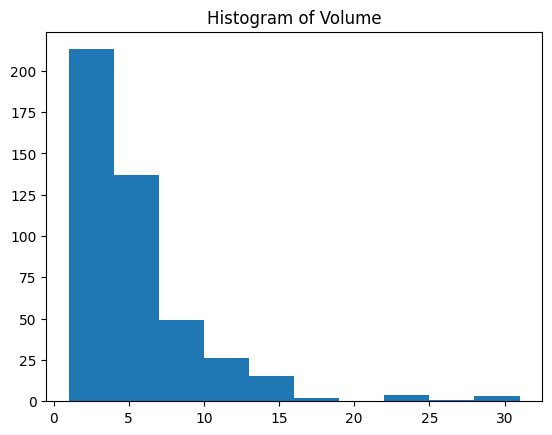

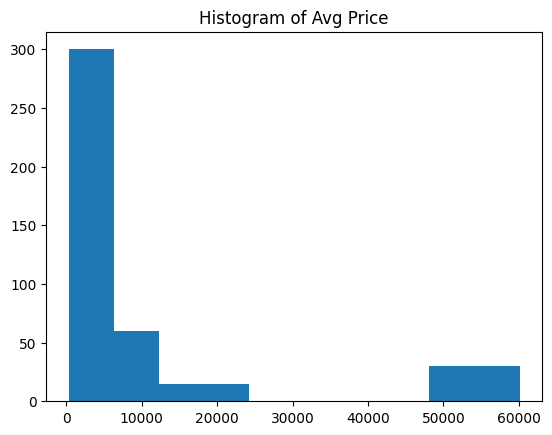

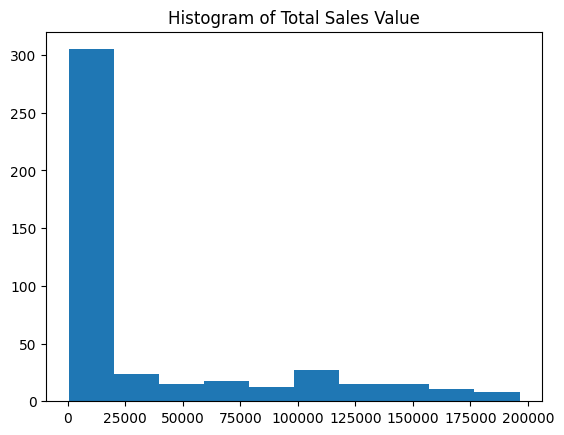

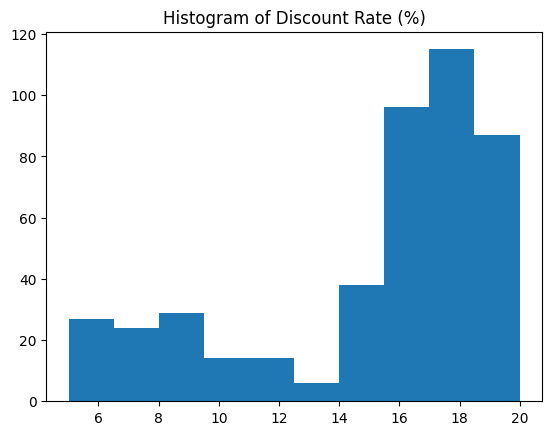

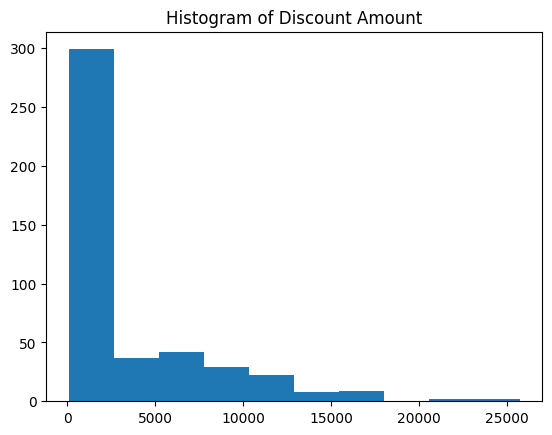

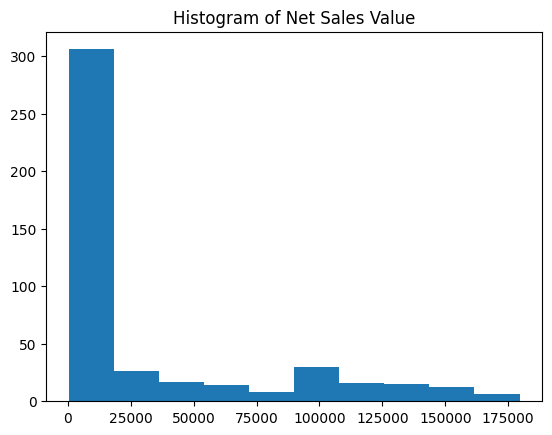

In [6]:
import matplotlib.pyplot as plt
for col in numerical_columns:
    plt.hist(df[col])
    plt.title(f'Histogram of {col}')
    plt.show()

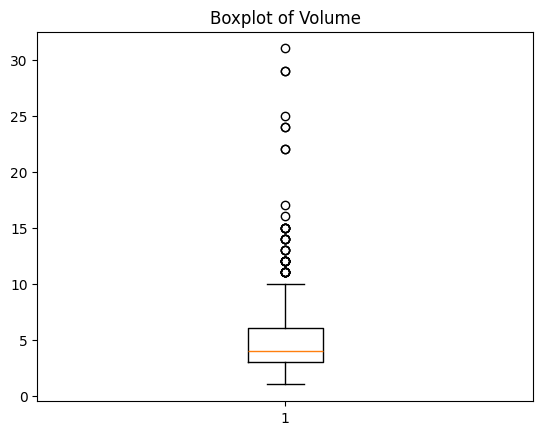

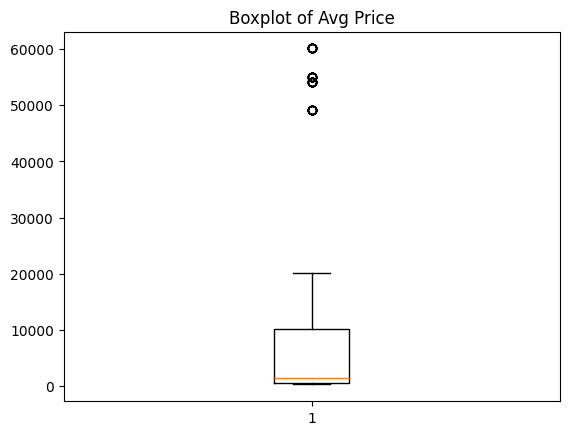

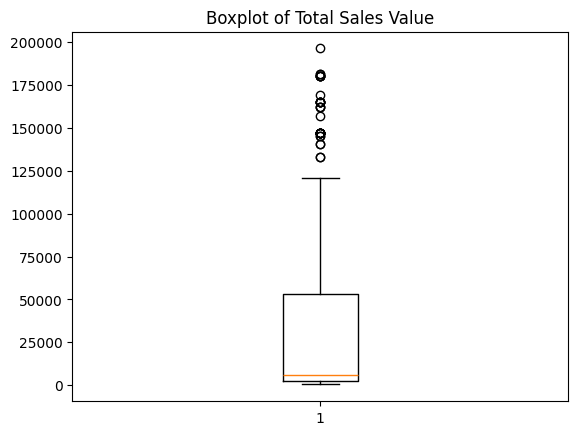

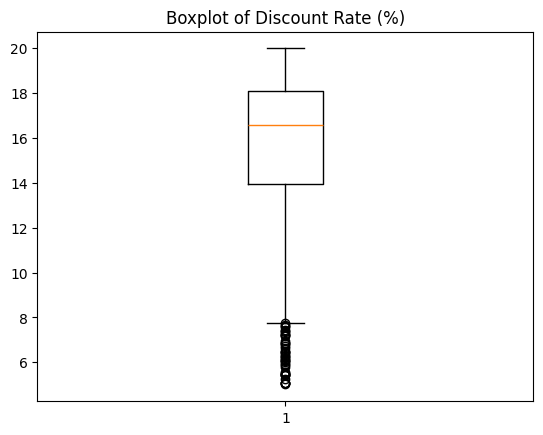

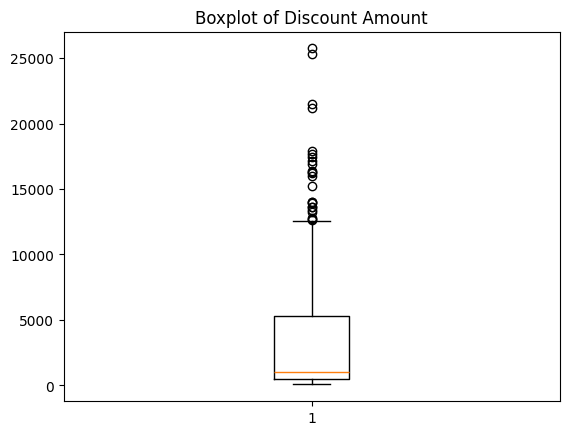

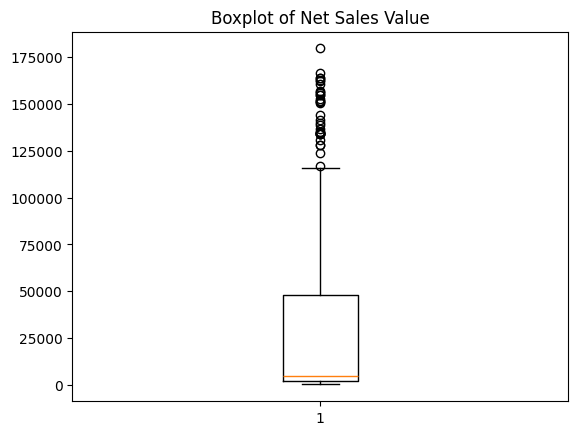

In [7]:
for col in numerical_columns:
    plt.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [8]:
categorical_columns = df.select_dtypes(include=['object']).columns

In [9]:
categorical_columns 

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')

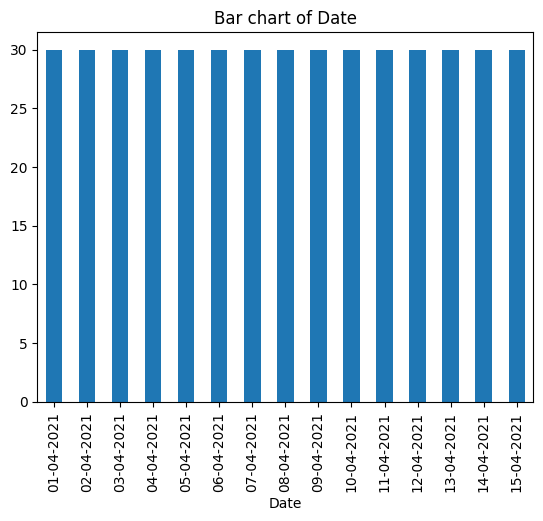

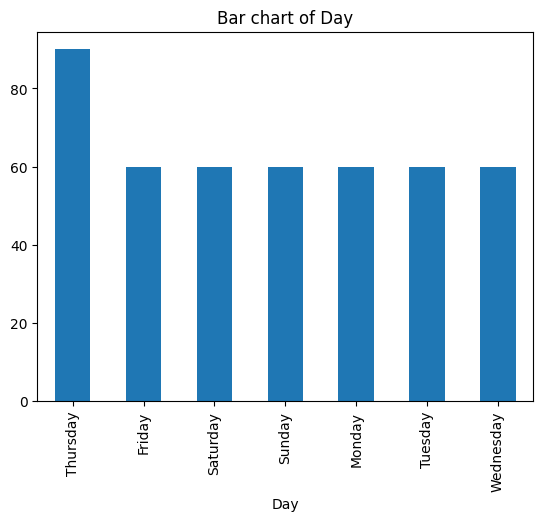

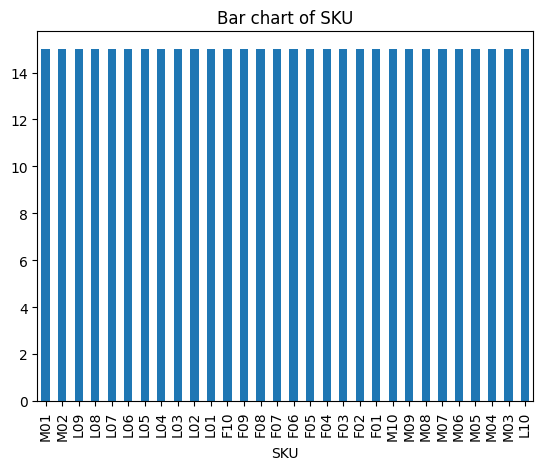

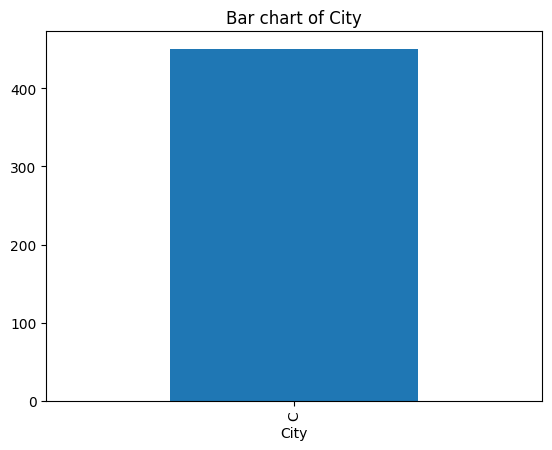

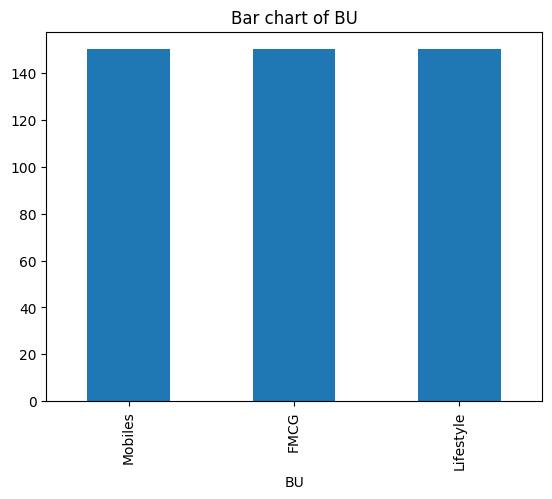

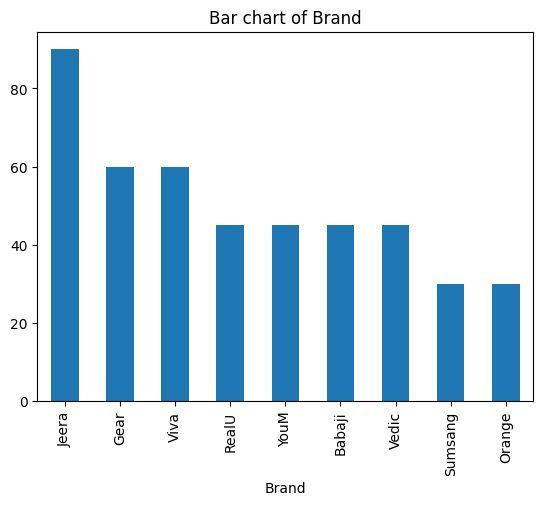

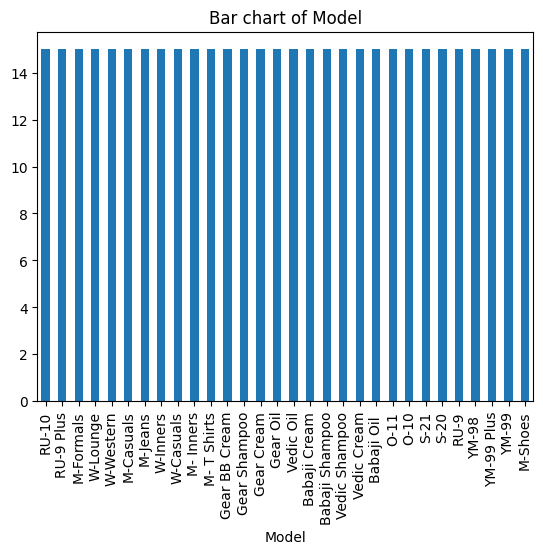

In [10]:
for col in categorical_columns:
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Bar chart of {col}')
    plt.show()

In [11]:
for col in numerical_columns:
    skewness = df[col].skew()
    print(f'Column: {col}\nSkewness: {skewness}\n')

Column: Volume
Skewness: 2.731723626557714

Column: Avg Price
Skewness: 1.9088730767759727

Column: Total Sales Value
Skewness: 1.5347293238977937

Column: Discount Rate (%)
Skewness: -1.0622943696988825

Column: Discount Amount
Skewness: 1.9130377339538271

Column: Net Sales Value
Skewness: 1.5408217575344376



In [12]:
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))]
print("Outliers:")
print(outliers)

Outliers:
    Date  Day  SKU City  Volume   BU Brand Model  Avg Price  \
0    NaN  NaN  NaN  NaN    15.0  NaN   NaN   NaN        NaN   
1    NaN  NaN  NaN  NaN     NaN  NaN   NaN   NaN        NaN   
2    NaN  NaN  NaN  NaN     NaN  NaN   NaN   NaN        NaN   
3    NaN  NaN  NaN  NaN     NaN  NaN   NaN   NaN        NaN   
4    NaN  NaN  NaN  NaN     NaN  NaN   NaN   NaN        NaN   
..   ...  ...  ...  ...     ...  ...   ...   ...        ...   
445  NaN  NaN  NaN  NaN     NaN  NaN   NaN   NaN        NaN   
446  NaN  NaN  NaN  NaN     NaN  NaN   NaN   NaN        NaN   
447  NaN  NaN  NaN  NaN     NaN  NaN   NaN   NaN        NaN   
448  NaN  NaN  NaN  NaN     NaN  NaN   NaN   NaN        NaN   
449  NaN  NaN  NaN  NaN     NaN  NaN   NaN   NaN        NaN   

     Total Sales Value  Discount Rate (%)  Discount Amount  Net Sales Value  
0             181500.0                NaN      21153.49882     160346.50118  
1                  NaN                NaN              NaN              NaN  

In [13]:
#Standardization of Numerical Variables

Standardization or Z-score normalization is a technique that rescales data to have a mean of 0 and standard deviation of 1. It’s done using the formula

Z=σx−μ
where

x is a value

μ is the mean

σ is the standard deviation

This process makes different datasets directly comparable and is often used in data analysis and machine learning.

In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [16]:
df[numerical_columns].describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,4.500000e+02,4.500000e+02,4.500000e+02,4.500000e+02,4.500000e+02,4.500000e+02
mean,6.118562e-17,3.157968e-17,1.578984e-17,-3.552714e-17,-5.526444e-17,1.973730e-17
std,1.001113e+00,1.001113e+00,1.001113e+00,1.001113e+00,1.001113e+00,1.001113e+00
min,-9.620925e-01,-5.627654e-01,-6.619170e-01,-2.406935e+00,-7.275032e-01,-6.508581e-01
25%,-4.889322e-01,-5.530754e-01,-6.163534e-01,-2.823066e-01,-6.406462e-01,-6.103625e-01
50%,-2.523521e-01,-4.985344e-01,-5.569226e-01,3.374180e-01,-5.233349e-01,-5.569025e-01
75%,2.208081e-01,-1.957016e-02,3.840648e-01,7.019781e-01,4.373018e-01,3.753543e-01
max,6.135311e+00,2.749009e+00,3.220894e+00,1.147360e+00,4.970494e+00,3.218536e+00


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-

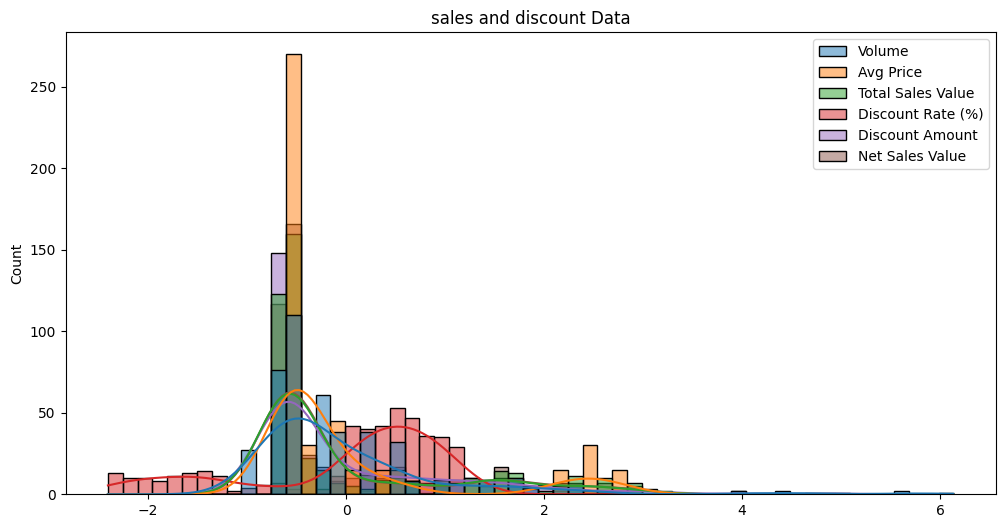

In [18]:
plt.figure(figsize=(12,6))
sns.histplot(df[numerical_columns], color='blue', kde=True)
plt.title('sales and discount Data')
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_to_scale = df['Volume'].values.reshape(-1, 1)
df['column1_standardized'] = scaler.fit_transform(data_to_scale)

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


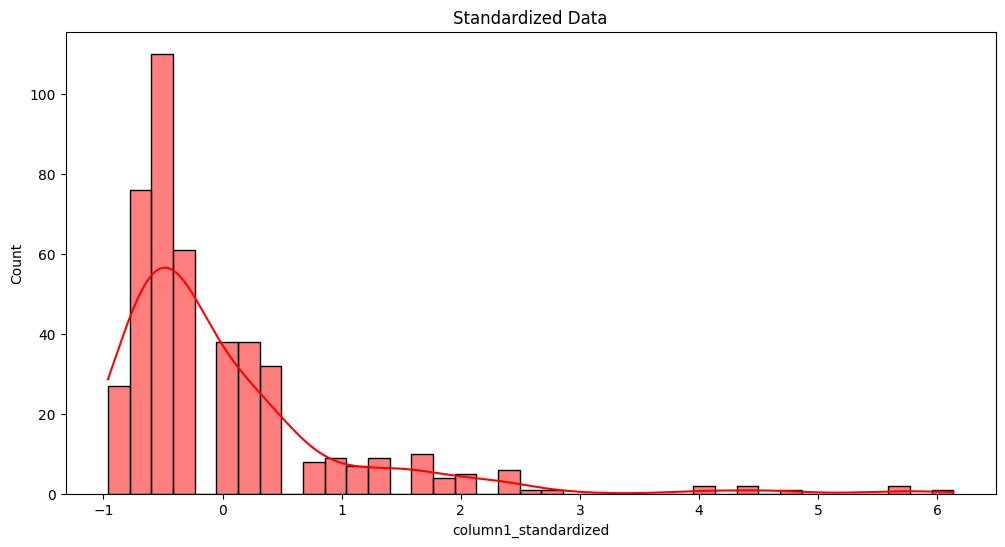

In [20]:
plt.figure(figsize=(12,6))
sns.histplot(df['column1_standardized'], color='red', kde=True)
plt.title('Standardized Data')
plt.show()

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_to_scale = df['Avg Price'].values.reshape(-1, 1)
df['column2_standardized'] = scaler.fit_transform(data_to_scale)

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


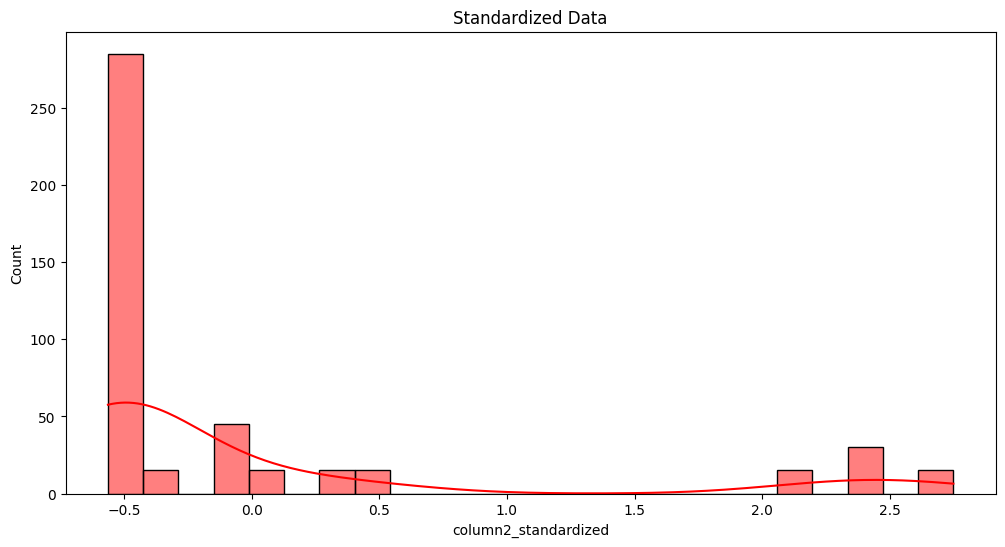

In [22]:
plt.figure(figsize=(12,6))
sns.histplot(df['column2_standardized'], color='red', kde=True)
plt.title('Standardized Data')
plt.show()

In [23]:
#Conversion of Categorical Data into Dummy Variables

Categorical data is converted into dummy variables (one-hot encoding) because machine learning algorithms require numerical input. This conversion allows these algorithms to perform mathematical operations on the data. It also ensures that all categories are given equal importance, which can lead to better model performance. However, it can increase data dimensionality if the categorical feature has many unique categories.

In [24]:
print(df.columns)

Index(['Date', 'Day', 'SKU', 'City', 'Volume', 'BU', 'Brand', 'Model',
       'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value', 'column1_standardized',
       'column2_standardized'],
      dtype='object')


In [29]:
df['Day'].value_counts()

Day
Thursday     90
Friday       60
Saturday     60
Sunday       60
Monday       60
Tuesday      60
Wednesday    60
Name: count, dtype: int64

In [32]:
from sklearn import preprocessing
trans = preprocessing.OneHotEncoder()
trans.fit(df)

OneHotEncoder()

In [40]:
df.encoded = pd.get_dummies(df, columns=['Day'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_9948\3801343968.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.encoded = pd.get_dummies(df, columns=['Day'])


In [41]:
print("\n Transformed dataframe with one hot encoding:")
print(df.encoded)


 Transformed dataframe with one hot encoding:
           Date  SKU City    Volume         BU  Brand       Model  Avg Price  \
0    01-04-2021  M01    C  2.350029    Mobiles  RealU       RU-10   0.091173   
1    01-04-2021  M02    C  1.167129    Mobiles  RealU   RU-9 Plus  -0.019570   
2    01-04-2021  M03    C  0.457388    Mobiles   YouM       YM-99   0.312659   
3    01-04-2021  M04    C  0.220808    Mobiles   YouM  YM-99 Plus   0.534146   
4    01-04-2021  M05    C -0.488932    Mobiles   YouM      YM-98   -0.130313   
..          ...  ...  ...       ...        ...    ...         ...        ...   
445  15-04-2021  L06    C -0.725512  Lifestyle  Jeera   M-Casuals  -0.506840   
446  15-04-2021  L07    C  0.220808  Lifestyle   Viva   W-Western  -0.434857   
447  15-04-2021  L08    C -0.725512  Lifestyle   Viva    W-Lounge  -0.490229   
448  15-04-2021  L09    C -0.488932  Lifestyle  Jeera   M-Formals  -0.473617   
449  15-04-2021  L10    C -0.962092  Lifestyle  Jeera     M-Shoes  -0.407

In [42]:
#Conclusion

Data preprocessing is a crucial step in data analysis and machine learning. It involves cleaning and transforming raw data into a format that can be easily understood and used by machine learning algorithms.

1.Standardization: Scales features to have a mean of 0 and standard deviation of 1. This is important because it ensures that no particular feature dominates others in the model, and it improves the numerical condition of optimization problems.

2.One-Hot Encoding: Converts categorical data into a format that can be used by machine learning algorithms. It’s essential because it allows these algorithms to work with categorical data effectively, leading to better prediction results.